# The Data

In [1]:
import pandas as pd
import numpy as np

Dataset: https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney

In [2]:
tvshows_df = pd.read_csv("tv_shows.csv")

In [3]:
tvshows_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [4]:
tvshows_df.dtypes

Unnamed: 0          int64
ID                  int64
Title              object
Year                int64
Age                object
IMDb               object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object

# Pre-Processing The Data

In [5]:
tvshows_df = tvshows_df.dropna(axis=0) # Remove null values

In [6]:
tvshows_df.drop_duplicates() # Remove duplicate values

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5336,5336,5684,Disney Family Sundays,2019,all,5.6/10,31/100,0,0,0,1,1
5339,5339,5687,Wild Chile,2018,7+,7.5/10,30/100,0,0,0,1,1
5340,5340,5688,Howie Mandel's Animals Doing Things,2018,all,3.2/10,30/100,0,0,0,1,1
5341,5341,5690,The Big Fib,2020,all,5.4/10,29/100,0,0,0,1,1


In [7]:
# Convert IMDb Rating to a numerical data type
tvshows_df['IMDb Rating'] = pd.to_numeric(tvshows_df['IMDb'].apply(lambda x: x[:3])).astype(float)
tvshows_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,IMDb Rating
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1,9.4
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1,8.7
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1,9.0
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1,8.8
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1,8.8


In [8]:
# Make IMDb the same scale as Rotten Tomatoes
tvshows_df["IMDb Rating"] = 10 * tvshows_df["IMDb Rating"]

In [9]:
# Drop IMDb column as it will not be used
tvshows_df = tvshows_df.drop('IMDb', axis=1)

In [10]:
# Make Rotten Tomatoes values into a single number
tvshows_df['Rotten Tomato Rating'] = pd.to_numeric(tvshows_df['Rotten Tomatoes'].apply(lambda x: x[:2])).astype(float)
tvshows_df.loc[tvshows_df['Rotten Tomatoes'].str.contains('100/100'), 'Rotten Tomato Rating'] = 100

In [11]:
# Drop Rotten Tomatoes column as it will not be used
tvshows_df = tvshows_df.drop('Rotten Tomatoes', axis=1)

In [12]:
# Drop Type column as it will not be used
tvshows_df = tvshows_df.drop('Type', axis=1)

In [13]:
tvshows_df.head()

,Unnamed: 0,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,IMDb Rating,Rotten Tomato Rating
0,0,1,Breaking Bad,2008,18+,1,0,0,0,94.0,100.0
1,1,2,Stranger Things,2016,16+,1,0,0,0,87.0,96.0
2,2,3,Attack on Titan,2013,18+,1,1,0,0,90.0,95.0
3,3,4,Better Call Saul,2015,18+,1,0,0,0,88.0,94.0
4,4,5,Dark,2017,16+,1,0,0,0,88.0,93.0


In [14]:
# Remove the "+" from the Age values
tvshows_df.loc[tvshows_df['Age'].str.contains('7+'), 'Age Group'] = 7
tvshows_df.loc[tvshows_df['Age'].str.contains('13+'), 'Age Group'] = 13
tvshows_df.loc[tvshows_df['Age'].str.contains('16+'), 'Age Group'] = 16
tvshows_df.loc[tvshows_df['Age'].str.contains('18+'), 'Age Group'] = 18
tvshows_df.loc[tvshows_df['Age'].str.contains('all'), 'Age Group'] = 100

In [18]:
# Convert Netflix, Hulu, Prime Video, and Disney+ columns into strings
tvshows_df.Netflix = tvshows_df.Netflix.astype(str)
tvshows_df.Hulu = tvshows_df.Hulu.astype(str)
tvshows_df['Disney+'] = tvshows_df['Disney+'].astype(str)
tvshows_df['Prime Video'] = tvshows_df['Prime Video'].astype(str)

In [19]:
# Make a new column to represent which media is on which streaming service(s)
tvshows_df.loc[tvshows_df['Netflix'].str.contains('1'), 'Service'] = 'N'
tvshows_df.loc[tvshows_df['Hulu'].str.contains('1'), 'Service'] = 'H'
tvshows_df.loc[tvshows_df['Disney+'].str.contains('1'), 'Service'] = 'D'
tvshows_df.loc[tvshows_df['Prime Video'].str.contains('1'), 'Service'] = 'P'

In [20]:
# Add all media that is on multiple streaming services to a column that will drop them all
tvshows_df.loc[tvshows_df['Netflix'].str.contains('1') & tvshows_df['Hulu'].str.contains('1'), 'Service'] = 'DROP'
tvshows_df.loc[tvshows_df['Netflix'].str.contains('1') & tvshows_df['Prime Video'].str.contains('1'), 'Service'] = 'DROP'
tvshows_df.loc[tvshows_df['Netflix'].str.contains('1') & tvshows_df['Disney+'].str.contains('1'), 'Service'] = 'DROP'
tvshows_df.loc[tvshows_df['Hulu'].str.contains('1') & tvshows_df['Prime Video'].str.contains('1'), 'Service'] = 'DROP'
tvshows_df.loc[tvshows_df['Hulu'].str.contains('1') & tvshows_df['Disney+'].str.contains('1'), 'Service'] = 'DROP'
tvshows_df.loc[tvshows_df['Prime Video'].str.contains('1') & tvshows_df['Disney+'].str.contains('1'), 'Service'] = 'DROP'
tvshows_df.loc[tvshows_df['Netflix'].str.contains('1') & tvshows_df['Hulu'].str.contains('1') & tvshows_df['Prime Video'].str.contains('1'), 'Service'] = 'DROP'
tvshows_df.loc[tvshows_df['Netflix'].str.contains('1') & tvshows_df['Hulu'].str.contains('1') & tvshows_df['Disney+'].str.contains('1'), 'Service'] = 'DROP'
tvshows_df.loc[tvshows_df['Netflix'].str.contains('1') & tvshows_df['Prime Video'].str.contains('1') & tvshows_df['Disney+'].str.contains('1'), 'Service'] = 'DROP'
tvshows_df.loc[tvshows_df['Hulu'].str.contains('1') & tvshows_df['Prime Video'].str.contains('1') & tvshows_df['Disney+'].str.contains('1'), 'Service'] = 'DROP'
tvshows_df.loc[tvshows_df['Netflix'].str.contains('1') & tvshows_df['Hulu'].str.contains('1') & tvshows_df['Prime Video'].str.contains('1') & tvshows_df['Disney+'].str.contains('1'), 'Service'] = 'DROP'

In [21]:
# Drop the "DROP" column
tvshows_df = tvshows_df[tvshows_df.Service != 'DROP']
tvshows_df.head()

,Unnamed: 0,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,IMDb Rating,Rotten Tomato Rating,Age Group,Service
0,0,1,Breaking Bad,2008,18+,1,0,0,0,94.0,100.0,18.0,N
1,1,2,Stranger Things,2016,16+,1,0,0,0,87.0,96.0,16.0,N
3,3,4,Better Call Saul,2015,18+,1,0,0,0,88.0,94.0,18.0,N
4,4,5,Dark,2017,16+,1,0,0,0,88.0,93.0,16.0,N
6,6,7,Peaky Blinders,2013,18+,1,0,0,0,88.0,93.0,18.0,N


# Data Understanding / Visualization

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

Streaming Service with the Highest Rated Content (IMDb)

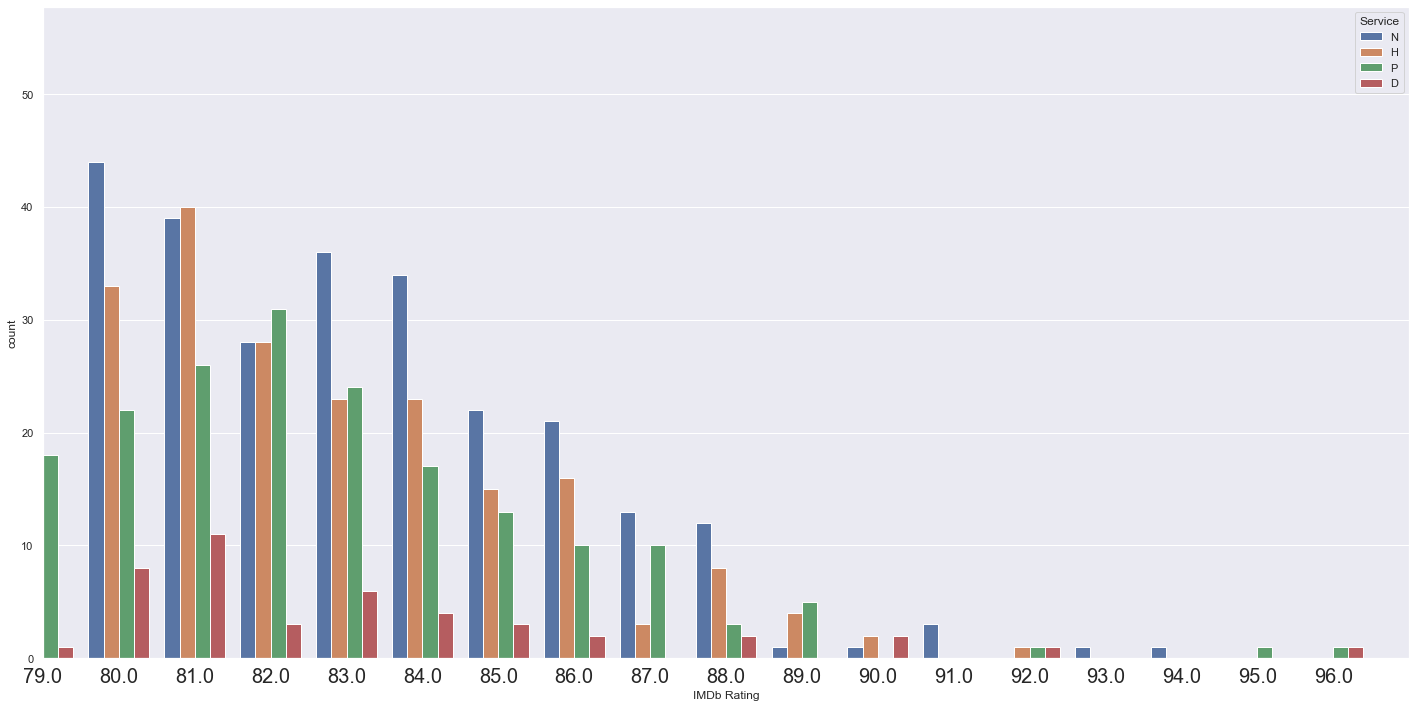

In [27]:
sns.set(rc={"figure.figsize":(20,10)})
ax = sns.countplot(x="IMDb Rating", data=tvshows_df, hue='Service')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()
ax.set_xlim(59, 77)
plt.show()

Streaming Service with the Highest Rated Content (Rotten Tomatoes)

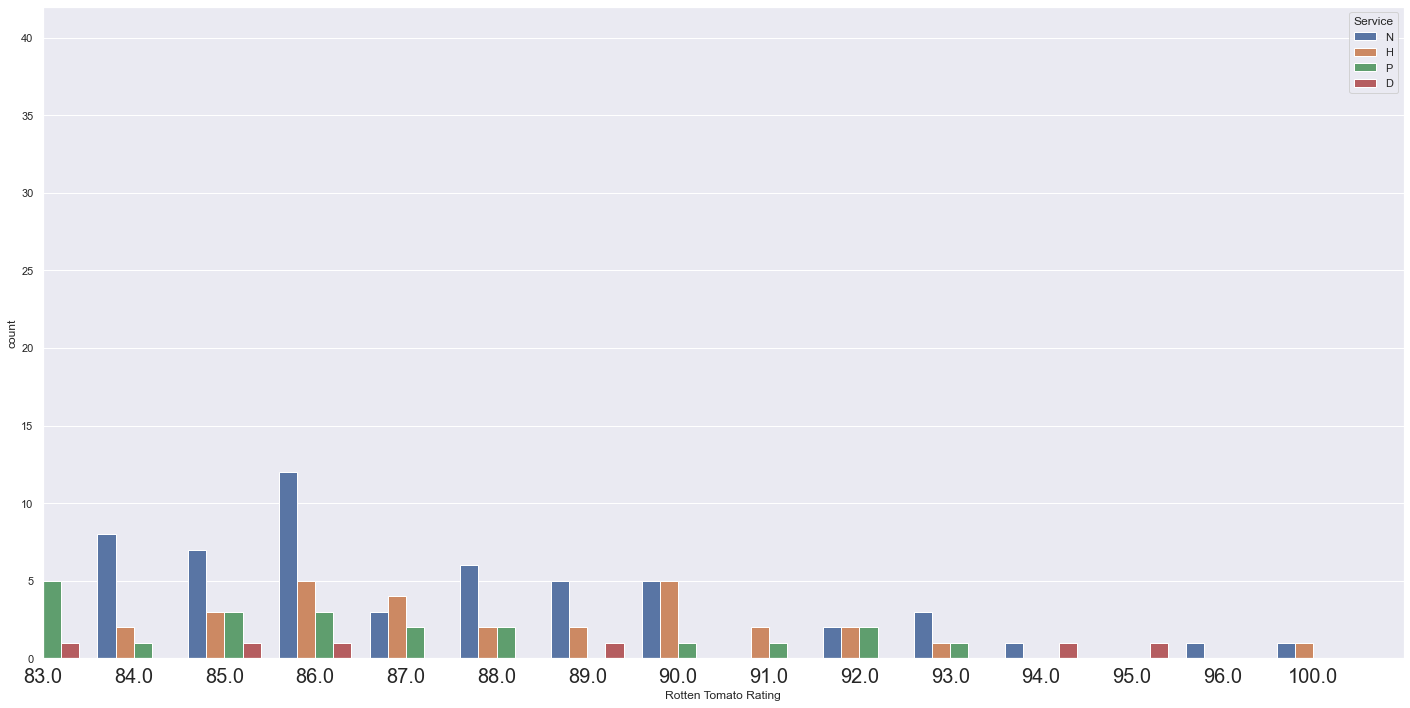

In [29]:
sns.set(rc={"figure.figsize":(20,10)})
ax = sns.countplot(x="Rotten Tomato Rating", data=tvshows_df, hue='Service')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()
ax.set_xlim(59, 74)
plt.show()

Best Streaming Service for Different Age Groups (IMDb)

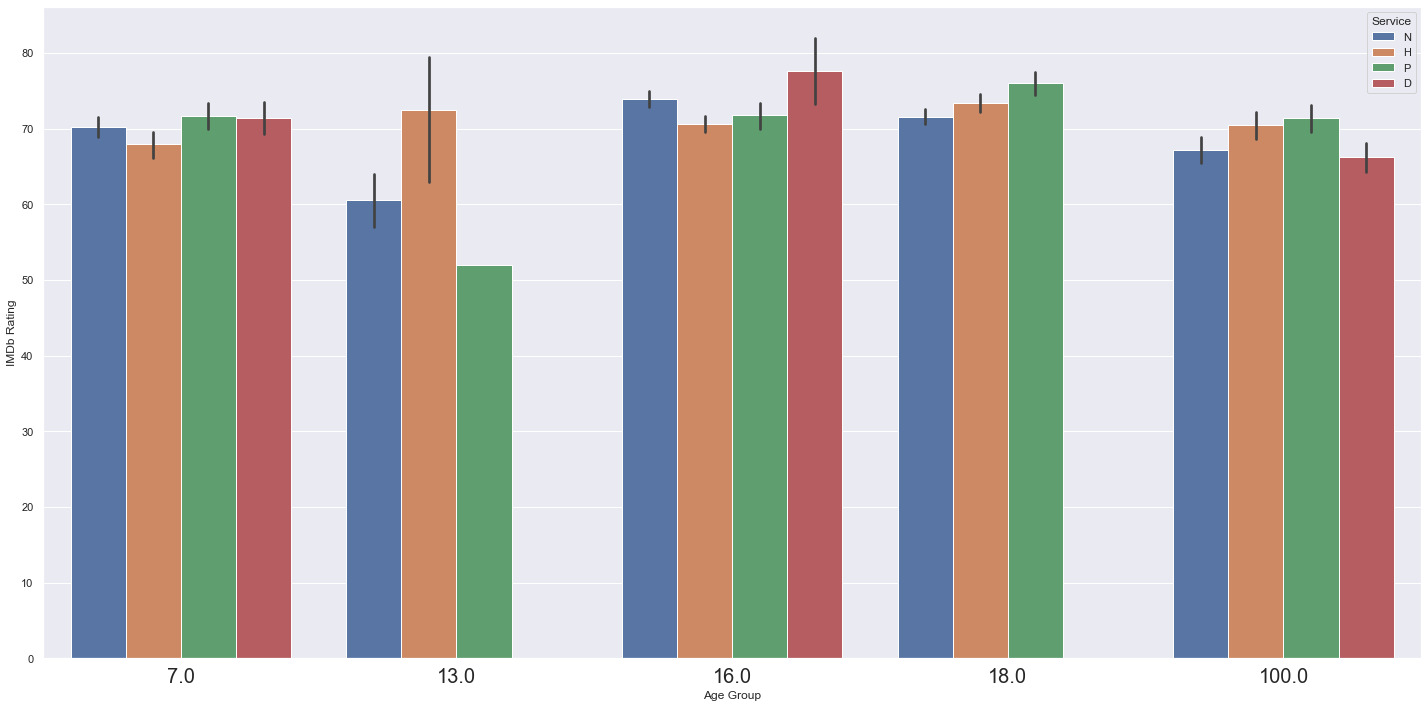

In [30]:
sns.set(rc={"figure.figsize":(20,10)})
ax = sns.barplot(x="Age Group", y='IMDb Rating', data=tvshows_df, hue='Service')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()
plt.show()

Best Streaming Service for Different Age Groups (Rotten Tomatoes)

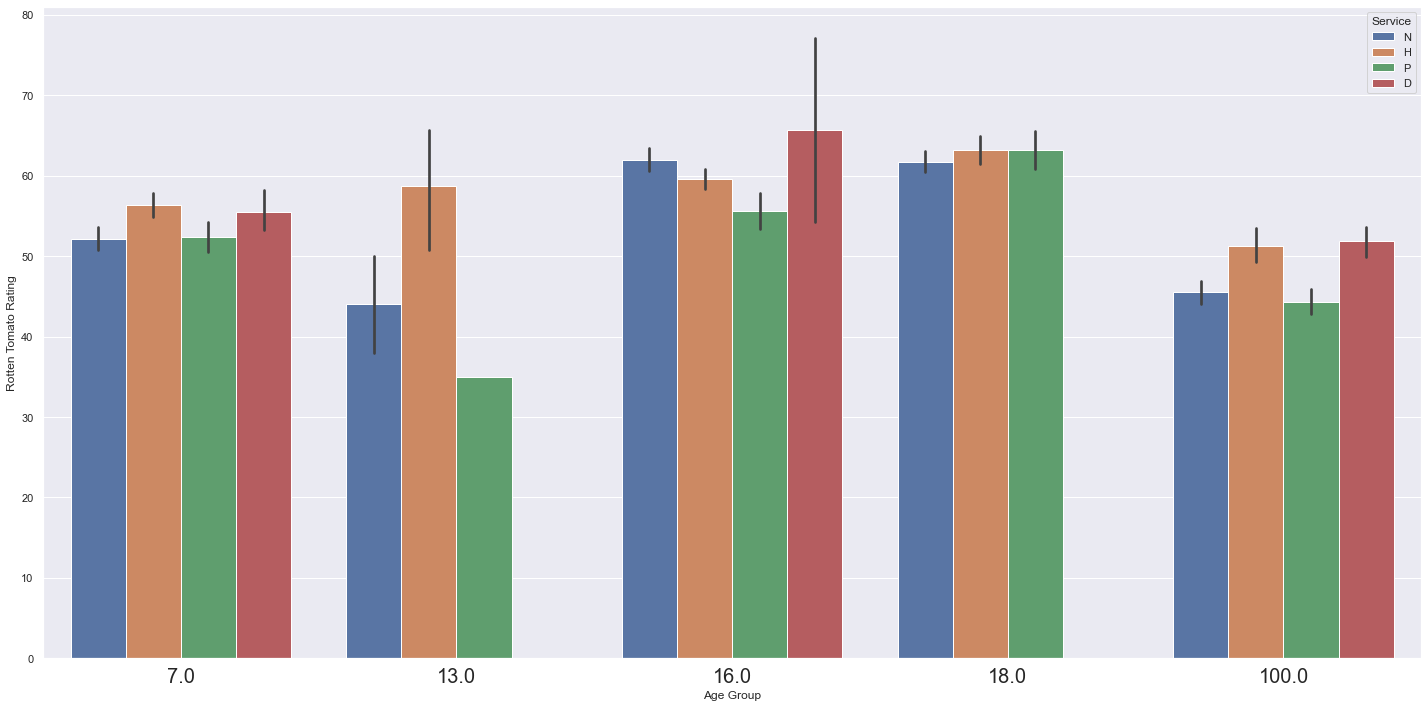

In [31]:
sns.set(rc={"figure.figsize":(20,10)})
ax = sns.barplot(x="Age Group", y='Rotten Tomato Rating', data=tvshows_df, hue='Service')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()
plt.show()

Most Up-To-Date Streaming Service

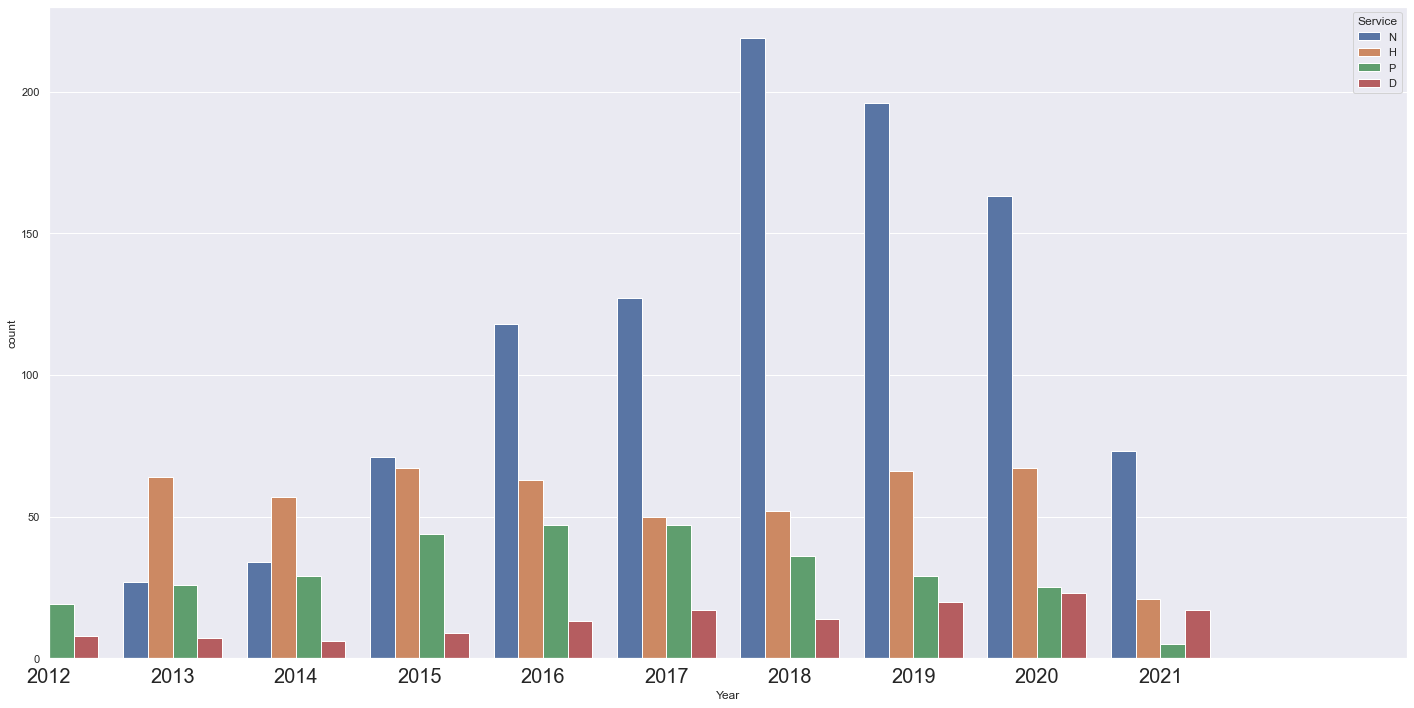

In [32]:
sns.set(rc={"figure.figsize":(20,10)})
ax = sns.countplot(x="Year", data=tvshows_df, hue='Service')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()
ax.set_xlim(59, 70)
plt.show()